<a href="https://colab.research.google.com/github/jamesliudotcc/fast_ai/blob/main/Build_a_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [ ]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [ ]:
threes = (path/"train"/"3").ls().sorted()
sevens = (path/"train"/"7").ls().sorted()

In [ ]:
Image??  # Ask for help on Image

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)  # Image is PIL.Image
im3

In [ ]:
array??  # Numpy's array

In [ ]:
array(im3)[:, 8:-8] # whole height, truncate the width to fit.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
       [166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
       [253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
       [230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
       [ 15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
       [  0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
       [  0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
       [  0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
       [  0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
       [  0,   0,   0,  43,  98,  

In [ ]:
tensor(im3)[:, 8:-8] # whole height, truncate the width to fit.

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0],
        [166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0],
        [253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0],
        [230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0],
        [ 15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0],
        [  0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0],
        [  0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0],
        [  0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0],
        [  0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2],
        [  0,   0,  

In [ ]:
seven_tensors = [tensor(Image.open(f)) for f in sevens]
three_tensors = [tensor(Image.open(f)) for f in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

I gave the following some thought, why would it work to .float() and /255? Because of broadcasting. If you apply a method like float that works on individual numbers, or do an arithmetic operation, it broadcasts. Ok, that was tripping me up. 

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

(<Axes: >, <Axes: >)

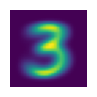

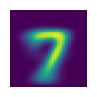

In [ ]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3),show_image(mean7)

<Axes: >

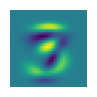

In [ ]:
show_image(mean3-mean7)